In [50]:
# -*- coding: utf-8 -*-
import jieba
jieba.set_dictionary('dict.txt.big')##加入繁體中文

print()
print("精確模式：")
seg_list = jieba.lcut("肺炎疫情的挑戰日益嚴峻，新竹清華大學自農曆年起陸續已採取了量測體溫等全面的防疫措施。")
print("Default Mode: ", seg_list)

Building prefix dict from /Users/ruru/NLP/HW1/dict.txt.big ...
Loading model from cache /var/folders/7t/bb_qyqxs0s1d1slg3618dg8r0000gn/T/jieba.cache.new



精確模式：


Loading model cost 1.394 seconds.
Prefix dict has been built successfully.


Default Mode:  ['肺炎', '疫情', '的', '挑戰', '日益', '嚴峻', '，', '新竹', '清華大學', '自', '農曆年', '起', '陸續', '已', '採取', '了', '量', '測體溫', '等', '全面', '的', '防疫', '措施', '。']


In [30]:
import jieba.analyse
news = '蘇貞昌表示，春節期間中國武漢肺炎疫情急遽升高，他在年假第一天就到中央流行疫情指揮中心聽取簡報，並宣布提升到二級開設。年假期間，衛福部及相關機關幾乎都放棄休假，每天監控及因應各項疫情，並宣布防疫資源整備情形及最新防疫作為，隨時讓國人瞭解最新疫情發展。因為資訊透明，應變迅速，讓國人感受到「有政府，可放心」，感謝陳其邁副院長費心督導，對於年假期間各防疫機關人員的堅守崗位，也表示肯定與感謝。'
tags = jieba.analyse.(news, topK=5, withWeight=True)

for tag in tags:
    print('word:', tag[0], 'tf-idf:', tag[1])

word: 期間 tf-idf: 0.5123471786957142
word: 疫情 tf-idf: 0.4620884068657143
word: 防疫 tf-idf: 0.42723651511071425
word: 機關 tf-idf: 0.34156478579714283
word: 國人 tf-idf: 0.34156478579714283


In [49]:
words = []
weight = []

with open('hw1-dataset.txt',encoding="utf-8") as file:
    for i,line in enumerate(file.readlines()):
        if i == 10:
            break
        print(line);
        tags = jieba.analyse.extract_tags(line, topK=5, withWeight=True)
        for tag in tags:
            words.append(tag[0])
    
    for word, w in zip(words, weight):
        print('word',index, ':', word, 'tf-idf:', w)

為什麼 聖結石 會被酸而 這群人 不會？	質感 劇本 成員 都差很多好嗎 不要拿腎結石來污辱這群人

為什麼慶祝228會被罵可是慶端午不會？	因為屈原不是台灣人，是楚國人。

有沒有戰神阿瑞斯的八卦?	爵士就是阿瑞斯 男主角最後死了

理論與實務最脫節的系	哪個系不脫節...你問最不脫節的簡單多了...

為什麼PTT這麼多人看棒球	肥宅才看棒球　系壘一堆胖子

為什麼達摩祖師傳那麼好看?	達摩從頭到尾都是被動 (別人問他問題

3D小畫家有人會畫嗎？	3D小當家有人會畫嗎

對天龍人來說宜蘭4南部還４東部	他國事務..

機車推出uber或計程機車會怎樣	載到肥宅會很痛苦

台中的龍邦世貿有人跳樓?	曾經當過全台第一高樓，可惜不到一年

word 1 : 這群 tf-idf: 1.9924612504833332
word 2 : 什麼 tf-idf: 0.9962306252416666
word 3 : 結石 tf-idf: 0.9962306252416666
word 4 : 不會 tf-idf: 0.9962306252416666
word 5 : 質感 tf-idf: 0.9962306252416666
word 6 : 什麼 tf-idf: 1.0867970457181817
word 7 : 慶祝 tf-idf: 1.0867970457181817
word 8 : 228 tf-idf: 1.0867970457181817
word 9 : 不會 tf-idf: 1.0867970457181817
word 10 : 因為 tf-idf: 1.0867970457181817
word 11 : 阿瑞斯 tf-idf: 2.6269413578444443
word 12 : 有沒有 tf-idf: 1.3283075003222222
word 13 : 戰神 tf-idf: 1.3283075003222222
word 14 : 最後 tf-idf: 1.3283075003222222
word 15 : 男主角 tf-idf: 1.1463509681666666
word 16 : 脫節 tf-idf: 3.5864302508699994
word 17 : ... tf-idf: 2.39095350058
word 


出現頻率：
index 26 八卦:87 0.011565
index 23 有沒有:77 0.010235
index 117 什麼:50 0.006646
index 242 是不是:40 0.005317
index 21 台灣:38 0.005051
index 174 可以:34 0.004519
index 1 為什麼:31 0.004121
index 400 中國:25 0.003323
index 846 現在:25 0.003323
index 44 肥宅:22 0.002924


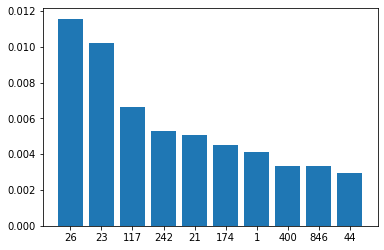

In [106]:
import re
from collections import Counter
import matplotlib.pyplot as plt

words = []
dict = {}
with open('hw1-dataset.txt',encoding="utf-8") as file:
    for i,line in enumerate(file.readlines()):
        line = re.sub("[A-Za-z0-9\：\?\(\.\·\—\，\。\“ \”]", "", line)
        
        #建立分詞
        jieba.add_word('為什麼')
        jieba.add_word('有沒有')
        tags = jieba.lcut(line,cut_all=False)
        for tag in tags:
            if tag == "" or tag == '\t' or tag == '\n':
                continue;
            words.append(tag)
        
        c = Counter()
        index = 1
        for x in words:
            if len(x)>1 and x != '\r\n':
                c[x] += 1
                dict.setdefault(x, index)
                index = index + 1
    print('\n出現頻率：')
    TotalWord = len(words)
    x_label = []
    y_label = []
    for (k,v) in c.most_common(100):
        freq = v/TotalWord
        print("index %d %s:%d %f"%(dict[k],k, v, freq))
        x_label.append(str(dict[k]))
        y_label.append(freq)
    
    plt.bar(x_label,y_label)
    plt.show()